<a href="https://colab.research.google.com/github/helaltamer/Titanic-Project/blob/main/helal_H_Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c titanic -p /content
!unzip /content/titanic.zip -d /content/titanic

Saving kaggle.json to kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 154MB/s]
Archive:  /content/titanic.zip
  inflating: /content/titanic/gender_submission.csv  
  inflating: /content/titanic/test.csv  
  inflating: /content/titanic/train.csv  


In [4]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [6]:
train_data.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.shape

(891, 12)

In [9]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
train_data = train_data.drop(columns='Cabin', axis=1)

In [11]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [12]:
print(train_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [13]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [14]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [15]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<Axes: xlabel='Survived', ylabel='count'>

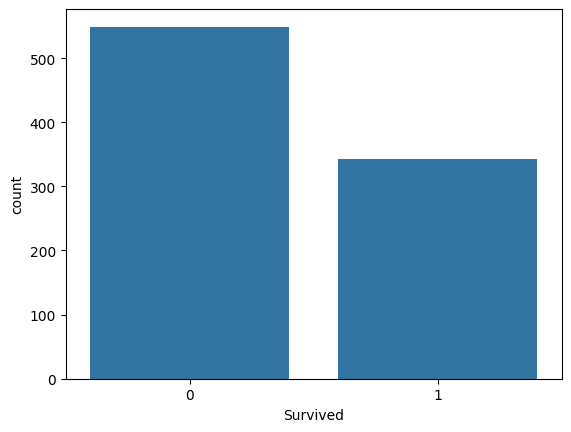

In [16]:
sns.countplot(x='Survived', data=train_data)

In [17]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

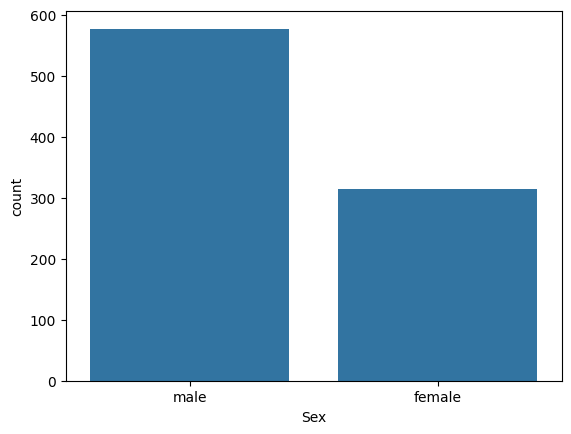

In [18]:
sns.countplot(x='Sex', data=train_data)

<Axes: xlabel='Sex', ylabel='count'>

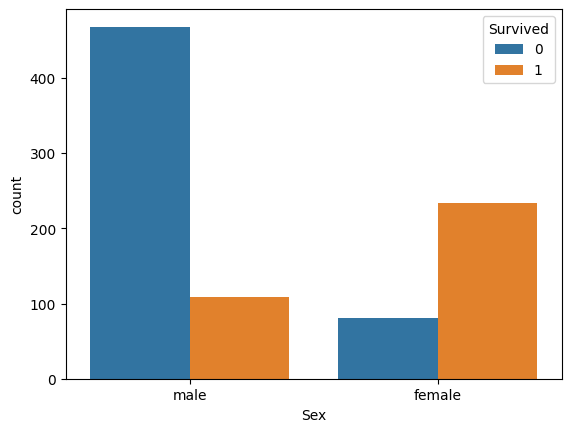

In [19]:
sns.countplot(x='Sex', hue='Survived', data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

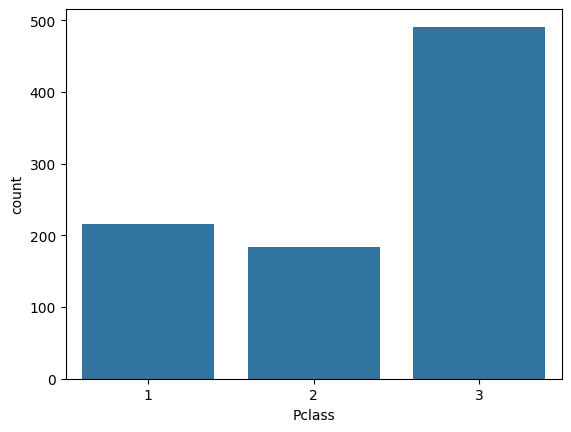

In [20]:
sns.countplot(x='Pclass', data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

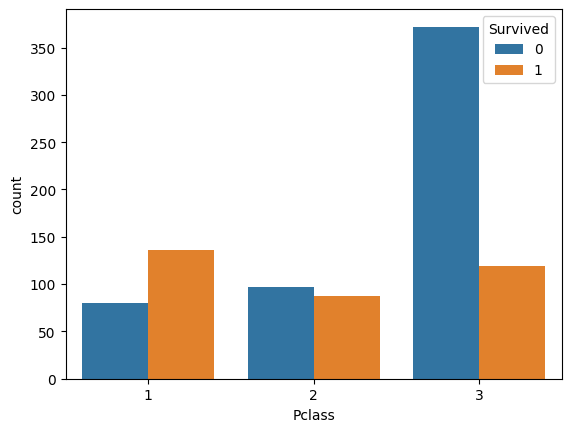

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)

In [22]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [23]:
train_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

/tmp/ipython-input-1898912477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


Split X,Y train

In [24]:

X_train = train_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)

Y_train = train_data['Survived']

In [25]:
print(X_train.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0


In [26]:
print(Y_train.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


Model using:
LogisticRegression

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

dt_model = DecisionTreeClassifier()

In [28]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import accuracy_score

X_train_prediction = dt_model.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_prediction)
print(training_accuracy)

0.9820426487093153


Model using:
DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

In [31]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
X_train_prediction = dt_model.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_prediction)
print(training_accuracy)

0.9820426487093153


In [33]:
from sklearn.metrics import classification_report

X_train_prediction = dt_model.predict(X_train)
print(classification_report(Y_train,X_train_prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



Preprocessing Test File

In [34]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [36]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,X_train_prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



FillandDropColums

>



In [38]:
test_data = test_data.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis=1)

In [39]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [40]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [41]:
print(test_data.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [42]:
print(test_data.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


Encoding on Test

In [43]:
test_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

/tmp/ipython-input-1010246771.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [44]:
print(test_data.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         2
1       3    1  47.0      1      0   7.0000         0
2       2    0  62.0      0      0   9.6875         2
3       3    0  27.0      0      0   8.6625         0
4       3    1  22.0      1      1  12.2875         0


In [50]:
import numpy as np # <-- You need to import numpy

label_map = {
    0:"Did not survive",
    1:"Survived"
}
print("Welcome to Titanic Survival Prediction:")
print("Enter the information for the person you want to know about: ")
pclass = int(input("Enter class (1,2,3): "))
Sex = int(input("Enter sex(0 = femal, 1 = male):"))
Age = float(input("Enter age in float number: "))
SibSp = int(input("Enter number of siblings/spouses aboard: "))
Parch = int(input("Enter number of parents/children  aboard: "))
Embarked = int(input("Enter embarked(0 = S, 1 = C, 2 = Q): "))
Fare = float(input("Enter fare: "))

input_data = np.array([[pclass,Sex,Age,SibSp,Parch,Fare,Embarked]])
# 4. Make prediction
prediction = dt_model.predict(input_data)[0]

# 5. Translate prediction to human-readable fromat
result = label_map[prediction]

# 6. Print result
print("Prediction of the person with:")
print(f"Class: {pclass}, Sex: {'Male' if Sex == 1 else 'Female'}, Age: {Age}, SibSp: {SibSp}, Parch: {Parch}, Fare: {Fare}, Embarked: {Embarked}")
print(f"prediction: {result}")

Welcome to Titanic Survival Prediction:
Enter the information for the person you want to know about: 
Enter class (1,2,3): 3
Enter sex(0 = femal, 1 = male):1
Enter age in float number: 31.000000
Enter number of siblings/spouses aboard: 1
Enter number of parents/children  aboard: 0
Enter embarked(0 = S, 1 = C, 2 = Q): 0
Enter fare: 18.0000
Prediction of the person with:
Class: 3, Sex: Male, Age: 31.0, SibSp: 1, Parch: 0, Fare: 18.0, Embarked: 0
prediction: Did not survive


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
